In [1]:
import numpy as np
from PYNQ_Car.CarOverlay.CarOverlay import CarOverlay
from xiaogong import PIDController
from pynq import GPIO
from PIL import Image
import IPython
import time
from pynq.xlnk import Xlnk
from pynq.lib.video.common import VideoMode
from PYNQ_Car.Infra.camera import Camera
from PYNQ_Car.Infra.MotionController import MotionController
import cv2
from pynq.lib.video.pipeline import PixelPacker
xlnk = Xlnk()
overlay = CarOverlay('/usr/local/lib/python3.6/dist-packages/PYNQ_Car/Overlay/Car.bit')

In [2]:
OV5640 = Camera(overlay.OV5640)
video_proc = overlay.video_proc
mc = MotionController(overlay.Arduino)

In [3]:
hdmi_out = overlay.video_output.axi_vdma.writechannel
out_unpack = overlay.video_output.pixel_unpack
hdmi_out.mode = VideoMode(1280,720,24)
out_unpack.bits_per_pixel = 24
overlay.OV5640.readchannel.tie(hdmi_out)
hdmi_out.start()

### 编写在notebook上显示图像的函数

In [4]:
def imshow_rgba(frame):
    image = Image.fromarray(frame)
    r, g, b = image.split()
    image = Image.merge('RGB', [r,g,b])
    IPython.display.clear_output(1)
    display(image)
def imshow_gray(frame):
    image = Image.fromarray(frame)
    IPython.display.clear_output(1)
    display(image)

### 显示测试通道

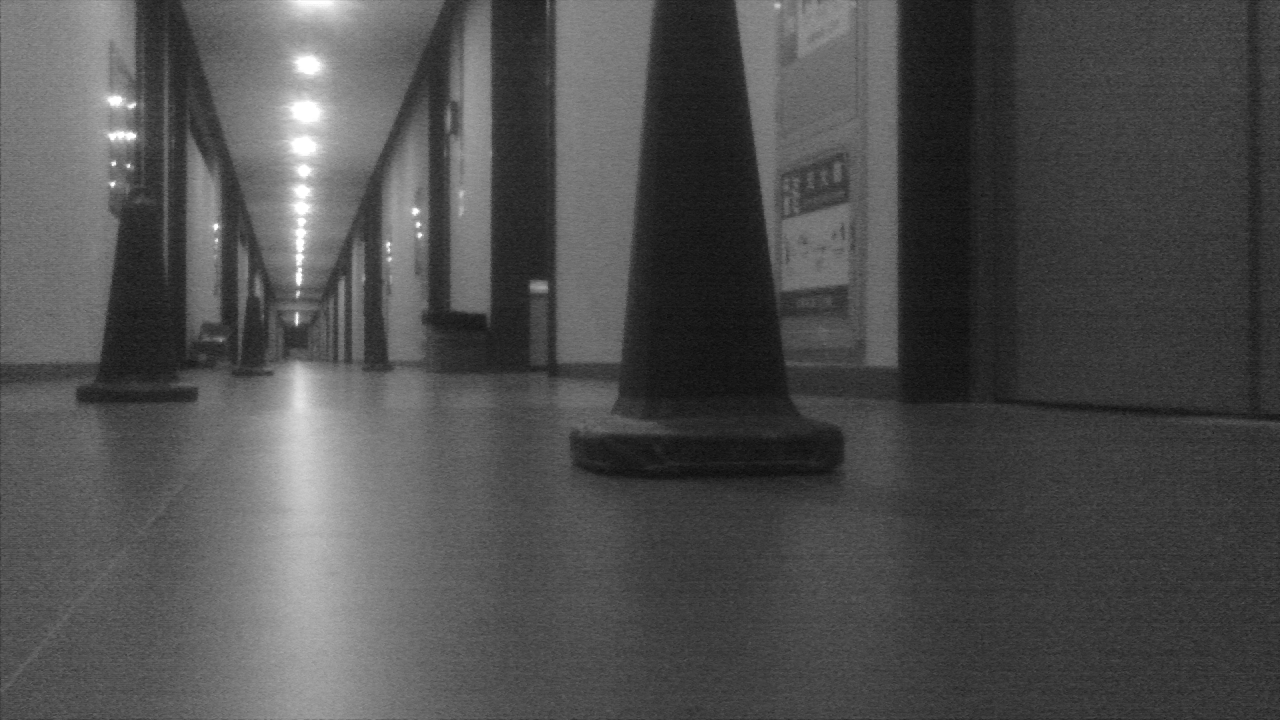

In [5]:
frame = overlay.OV5640.get_frame('gray')
imshow_gray(frame)
frame.freebuffer()

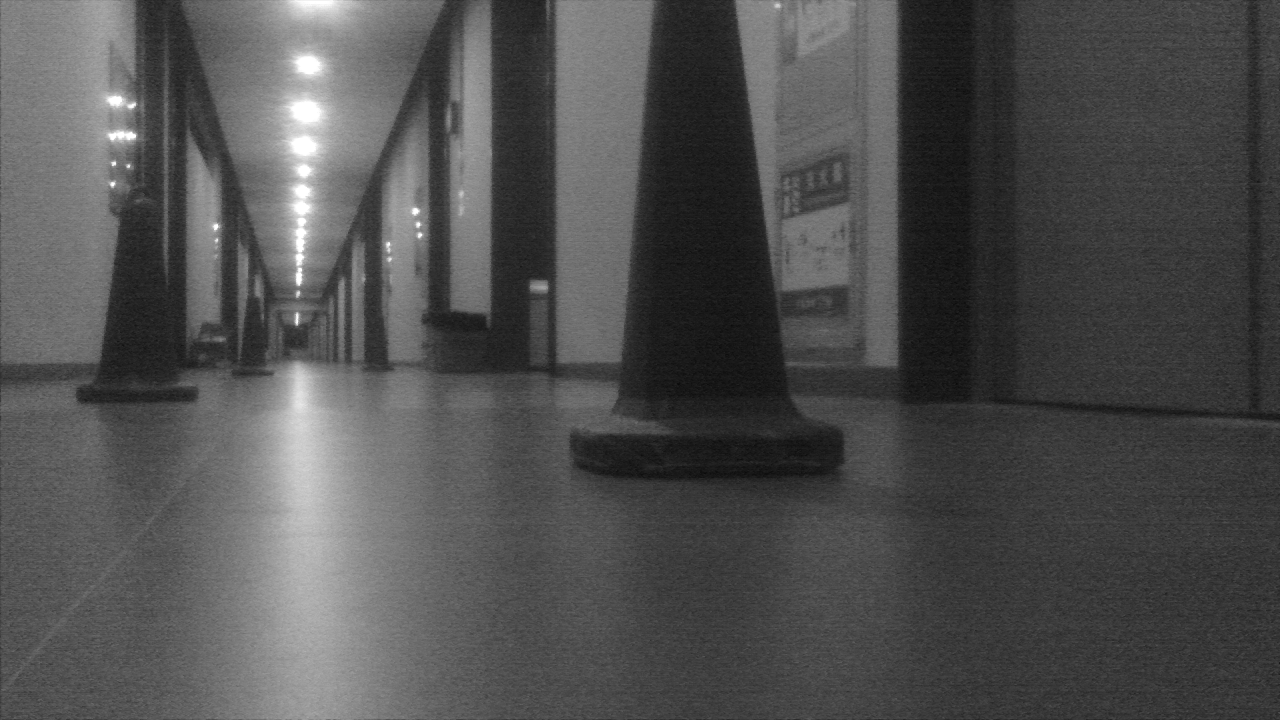

In [6]:
frame = OV5640.get_frame('gray')
res = video_proc.Bypass(frame)
imshow_gray(res)
frame.freebuffer()
res.freebuffer()

### 主函数

In [ ]:
pid = PIDController(kp=0.7, ki=0.00, kd=1.2, output_min=-60, output_max=60)

while True:
    image = overlay.OV5640.get_frame('gray')
    height, width = image.shape[:2]
    
#     image = video_proc.SobelX(image)
#     image = video_proc.Canny(image,50,70)
#    只取下面
    cv_height = height//3
    image = image[2*cv_height:, :]
    #二值化处理
    ret2, image = cv2.threshold(image, 70, 255, cv2.THRESH_BINARY_INV)  #+ cv2.THRESH_OTSU _INV

#     imshow_gray(image)      #显示图
    
    #分左，中，右三个区域
    part_width = width // 3
    
    left_part = image[:, 0:part_width]
    middle_part = image[:, part_width:part_width*2]
    right_part = image[:, part_width*2:]

    avg_intensity1 = np.mean(left_part)
    avg_intensity2 = np.mean(middle_part)
    avg_intensity3 = np.mean(right_part)
    
    #PID误差
    err = avg_intensity1 - avg_intensity3
    output = pid.compute(err)

    print("err:%.2f" %err)
    d = [avg_intensity1,avg_intensity2,avg_intensity3]
#     print(d)
#     print("output: %d" %output)
#     print("angle: %d" %angle)
#     print('avg_intensity2:%.2f' %avg_intensity2)
#     print("ret2: %d"%ret2)
    
    if 150 < avg_intensity2:
        if 220 < avg_intensity2 and avg_intensity1 > 220 and  avg_intensity3 > 220 and err < 10:
            angle = 60
        else:
            angle = output
    elif  avg_intensity2 <= 90:
        if err < -80:
            angle = -30  # 左转角度
        elif err > 80:
            angle = 30  # 右转角度
        else:
            angle = 0
    else:    # 直行
        angle = 0
    mc.set_direction(angle)
    print("angle: %d" %angle)
    
    mc.set_velocity(2000)

err:-135.88
angle: -30
err:-136.69
angle: -30
err:-134.60
angle: -30
err:-135.37
angle: -30
err:-134.96
angle: -30
err:-130.90
angle: -30
err:-125.24
angle: -30
err:-112.43
angle: -30
err:-96.29
angle: -30
err:-69.80
angle: 0
err:-31.76
angle: 0
err:25.86
angle: 0
err:76.28
angle: 0
err:108.52
angle: 30
err:131.09
angle: 30
err:140.08
angle: 30
err:147.11
angle: 30
err:155.25
angle: 30
err:153.19
angle: 30
err:153.68
angle: 30
err:157.58
angle: 30
err:146.03
angle: 30
err:131.57
angle: 30
err:111.50
angle: 30
err:79.00
angle: 0
err:36.34
angle: 0
err:-10.56
angle: 0
err:-46.00
angle: 0
err:-83.51
angle: -30
err:-120.04
angle: -30
err:-143.38
angle: -30
err:-160.26
angle: -30
err:-158.17
angle: -30
err:-153.97
angle: -30
err:-138.86
angle: -30
err:-106.16
angle: -30
err:-58.79
angle: 0
err:-24.87
angle: 0
err:-19.72
angle: 0
err:30.10
angle: 0
err:77.40
angle: 0
err:152.09
angle: 30
err:199.00
angle: 30
err:214.09
angle: 30
err:214.90
angle: 30
err:218.27
angle: 30
err:217.98
angle: 30


err:-106.19
angle: 0
err:-98.97
angle: 0
err:-86.77
angle: 0
err:-79.97
angle: 0
err:-73.41
angle: 0
err:-72.83
angle: 0
err:-71.25
angle: 0
err:-67.75
angle: 0
err:-61.32
angle: 0
err:-57.61
angle: 0
err:-48.19
angle: 0
err:-38.14
angle: -14
err:-21.55
angle: 4
err:-14.71
angle: 0
err:-8.20
angle: 0
err:-8.36
angle: 0
err:-6.18
angle: 0
err:7.71
angle: 0
err:20.21
angle: 0
err:-5.02
angle: 0
err:0.39
angle: 0
err:-3.75
angle: 0
err:-18.14
angle: 0
err:-27.30
angle: 0
err:-39.13
angle: 0
err:-61.88
angle: 0
err:-90.73
angle: -30
err:-88.70
angle: -30
err:-96.70
angle: -30
err:-95.80
angle: -30
err:-97.22
angle: -30
err:-107.65
angle: -30
err:-121.36
angle: -30
err:-128.14
angle: -30
err:-125.91
angle: -30
err:-120.69
angle: -30
err:-120.46
angle: 0
err:-122.18
angle: 0
err:-128.22
angle: 0
err:-132.19
angle: 0
err:-133.62
angle: 0
err:-143.73
angle: 0
err:-153.33
angle: 0
err:-161.30
angle: 0
err:-165.65
angle: 0
err:-168.96
angle: 0
err:-170.63
angle: 0
err:-174.73
angle: 0
err:-183.9

err:7.07
angle: 0
err:-6.69
angle: 0
err:-8.82
angle: 0
err:-8.22
angle: 0
err:-6.61
angle: 0
err:-5.02
angle: 0
err:-6.02
angle: 0
err:-8.06
angle: 0
err:-6.17
angle: 0
err:-7.30
angle: 0
err:-6.15
angle: 0
err:-4.74
angle: 0
err:-3.74
angle: 0
err:-2.72
angle: 0
err:-0.78
angle: 0
err:0.00
angle: 0
err:-0.01
angle: 0
err:0.10
angle: 0
err:0.00
angle: 0
err:-0.04
angle: 0
err:0.07
angle: 0
err:-0.00
angle: 0
err:0.23
angle: 0
err:0.19
angle: 0
err:0.11
angle: 0
err:0.27
angle: 0
err:-0.08
angle: 0
err:0.52
angle: 0
err:0.73
angle: 0
err:0.77
angle: 0
err:1.29
angle: 0
err:1.66
angle: 0
err:3.11
angle: 0
err:6.49
angle: 0
err:7.70
angle: 0
err:7.27
angle: 0
err:8.33
angle: 0
err:7.95
angle: 0
err:12.18
angle: 0
err:13.59
angle: 0
err:14.89
angle: 0
err:19.70
angle: 0
err:20.93
angle: 0
err:30.36
angle: 0
err:31.66
angle: 0
err:35.43
angle: 0
err:35.28
angle: 0
err:38.47
angle: 0
err:47.14
angle: 0
err:54.73
angle: 0
err:56.72
angle: 0
err:58.04
angle: 0
err:61.93
angle: 0
err:71.79
ang

err:-0.01
angle: 0
err:-0.00
angle: 0
err:-0.01
angle: 0
err:0.00
angle: 0
err:0.00
angle: 0
err:0.00
angle: 0
err:0.00
angle: 0
err:0.01
angle: 0
err:-0.00
angle: 0
err:-0.01
angle: 0
err:-0.01
angle: 0
err:-0.01
angle: 0
err:-0.01
angle: 0
err:0.06
angle: 0
err:0.12
angle: 0
err:0.23
angle: 0
err:0.39
angle: 0
err:0.55
angle: 0
err:0.70
angle: 0
err:1.54
angle: 0
err:2.52
angle: 0
err:2.76
angle: 0
err:2.47
angle: 0
err:4.70
angle: 0
err:7.77
angle: 0
err:11.30
angle: 0
err:10.91
angle: 0
err:10.46
angle: 0
err:13.75
angle: 0
err:18.05
angle: 0
err:29.30
angle: 0
err:34.13
angle: 0
err:31.88
angle: 0
err:36.08
angle: 0
err:36.58
angle: 0
err:50.21
angle: 0
err:57.43
angle: 0
err:59.18
angle: 0
err:63.10
angle: 0
err:68.86
angle: 0
err:85.52
angle: 30
err:95.87
angle: 30
err:108.16
angle: 30
err:110.36
angle: 30
err:120.54
angle: 30
err:130.86
angle: 30
err:138.64
angle: 30
err:143.24
angle: 30
err:134.84
angle: 30
err:126.78
angle: 30
err:117.18
angle: 30
err:109.80
angle: 30
err:93.

err:68.27
angle: 31
err:47.39
angle: 8
err:33.73
angle: 7
err:25.77
angle: 8
err:3.78
angle: -23
err:-31.98
angle: -60
err:-79.91
angle: -60
err:-117.92
angle: -60
err:-135.35
angle: -60
err:-144.65
angle: -60
err:-145.25
angle: -60
err:-133.88
angle: 0
err:-146.97
angle: 0
err:-165.87
angle: 0
err:-152.35
angle: 0
err:-124.18
angle: 0
err:-105.28
angle: 0
err:-128.56
angle: 0
err:-136.60
angle: 0
err:-142.32
angle: -30
err:-116.27
angle: -30
err:-107.17
angle: -30
err:-89.76
angle: -30
err:-58.97
angle: 0
err:-48.80
angle: 0
err:-53.36
angle: 0
err:-50.34
angle: 0
err:-40.42
angle: 0
err:-37.91
angle: 0
err:-38.81
angle: 0
err:-40.74
angle: 0
err:-47.66
angle: 0
err:-61.58
angle: 0
err:-79.17
angle: 0
err:-87.58
angle: -30
err:-94.30
angle: -30
err:-105.58
angle: -30
err:-119.48
angle: -30
err:-120.71
angle: -30
err:-119.56
angle: -30
err:-114.78
angle: -30
err:-99.61
angle: -30
err:-89.43
angle: -30
err:-85.39
angle: -30
err:-81.20
angle: -30
err:-79.32
angle: 0
err:-84.75
angle: -30

err:150.60
angle: 0
err:152.35
angle: 30
err:169.90
angle: 30
err:161.67
angle: 30
err:151.37
angle: 30
err:120.56
angle: 0
err:105.28
angle: 0
err:100.29
angle: 0
err:113.95
angle: 60
err:117.67
angle: 60
err:117.96
angle: 60
err:113.72
angle: 60
err:112.71
angle: 60
err:108.85
angle: 60
err:97.56
angle: 54
err:96.23
angle: 60
err:97.20
angle: 60
err:88.25
angle: 51
err:82.38
angle: 50
err:95.05
angle: 60
err:97.55
angle: 60
err:82.68
angle: 40
err:68.76
angle: 31
err:74.00
angle: 58
err:87.19
angle: 60
err:81.88
angle: 50
err:78.48
angle: 50
err:86.42
angle: 60
err:101.03
angle: 60
err:131.26
angle: 0
err:163.22
angle: 0
err:193.65
angle: 30
err:215.71
angle: 30
err:196.12
angle: 30
err:145.82
angle: 30
err:98.50
angle: 30
err:56.98
angle: 0
err:44.13
angle: 0
err:62.04
angle: 0
err:88.47
angle: 30
err:75.76
angle: 0
err:37.67
angle: 0
err:21.01
angle: 0
err:-1.77
angle: 0
err:40.47
angle: 0
err:36.82
angle: 0
err:13.00
angle: 0
err:-19.12
angle: 0
err:-42.60
angle: 0
err:-21.40
angl

err:-11.39
angle: 0
err:-10.39
angle: 0
err:-12.37
angle: 0
err:-12.18
angle: 0
err:-11.68
angle: 0
err:-12.30
angle: 0
err:-13.47
angle: 0
err:-12.69
angle: 0
err:-13.79
angle: 0
err:-12.98
angle: 0
err:-12.75
angle: 0
err:-10.65
angle: 0
err:-10.01
angle: 0
err:-11.16
angle: 0
err:-12.46
angle: 0
err:-8.50
angle: 0
err:-11.94
angle: 0
err:-11.65
angle: 0
err:-12.20
angle: 0
err:-14.11
angle: 0
err:-13.47
angle: 0
err:-12.16
angle: 0
err:-13.86
angle: 0
err:-13.84
angle: 0
err:-14.06
angle: 0
err:-12.78
angle: 0
err:-13.49
angle: 0
err:-14.99
angle: 0
err:-14.09
angle: 0
err:-14.71
angle: 0
err:-14.58
angle: 0
err:-13.92
angle: 0
err:-16.31
angle: 0
err:-15.73
angle: 0
err:-15.63
angle: 0
err:-16.31
angle: 0
err:-16.03
angle: 0
err:-16.44
angle: 0
err:-13.19
angle: 0
err:-12.05
angle: 0
err:-12.26
angle: 0
err:-13.06
angle: 0
err:-12.14
angle: 0
err:-11.94
angle: 0
err:-11.37
angle: 0
err:-12.71
angle: 0
err:-11.14
angle: 0
err:-14.05
angle: 0
err:-12.86
angle: 0
err:-12.16
angle: 0
e

err:-34.85
angle: 0
err:-29.01
angle: 0
err:-30.83
angle: 0
err:-29.16
angle: 0
err:-37.71
angle: 0
err:-31.41
angle: 0
err:-32.67
angle: 0
err:-29.91
angle: 0
err:-29.57
angle: 0
err:-28.61
angle: 0
err:-36.94
angle: 0
err:-31.32
angle: 0
err:-31.24
angle: 0
err:-33.75
angle: 0
err:-28.86
angle: 0
err:-35.40
angle: 0
err:-32.82
angle: 0
err:-36.15
angle: 0
err:-37.12
angle: 0
err:-33.19
angle: 0
err:-32.27
angle: 0
err:-31.46
angle: 0
err:-31.69
angle: 0
err:-32.78
angle: 0
err:-32.53
angle: 0
err:-36.98
angle: 0
err:-26.62
angle: 0
err:-34.34
angle: 0
err:-33.16
angle: 0
err:-35.02
angle: 0
err:-30.85
angle: 0
err:-31.45
angle: 0
err:-32.36
angle: 0
err:-28.51
angle: 0
err:-37.28
angle: 0
err:-35.04
angle: 0
err:-35.52
angle: 0
err:-30.79
angle: 0
err:-31.85
angle: 0
err:-38.91
angle: 0
err:-37.35
angle: 0
err:-32.12
angle: 0
err:-36.16
angle: 0
err:-36.69
angle: 0
err:-36.36
angle: 0
err:-33.23
angle: 0
err:-36.38
angle: 0
err:-31.63
angle: 0
err:-37.46
angle: 0
err:-31.02
angle: 0


err:43.28
angle: 0
err:54.19
angle: 0
err:50.38
angle: 0
err:64.77
angle: 0
err:69.59
angle: 0
err:81.12
angle: 30
err:87.31
angle: 30
err:93.61
angle: 30
err:102.30
angle: 30
err:114.62
angle: 30
err:130.39
angle: 30
err:136.89
angle: 30
err:120.87
angle: 30
err:104.02
angle: 30
err:67.62
angle: 0
err:50.18
angle: 0
err:34.97
angle: 0
err:25.88
angle: 0
err:24.27
angle: 0
err:24.59
angle: 0
err:27.26
angle: 0
err:33.89
angle: 0
err:32.96
angle: 0
err:38.12
angle: 0
err:38.97
angle: 0
err:42.96
angle: 0
err:39.13
angle: 0
err:47.46
angle: 0
err:51.28
angle: 0
err:45.47
angle: 0
err:52.49
angle: 0
err:50.10
angle: 0
err:62.16
angle: 0
err:61.32
angle: 0
err:64.91
angle: 0
err:65.18
angle: 0
err:70.74
angle: 0
err:66.14
angle: 0
err:75.58
angle: 0
err:84.31
angle: 30
err:80.34
angle: 30
err:93.21
angle: 30
err:82.12
angle: 30
err:82.52
angle: 30
err:93.82
angle: 30
err:89.42
angle: 30
err:102.95
angle: 30
err:108.47
angle: 30
err:91.07
angle: 30
err:65.76
angle: 0
err:28.24
angle: 0
err:

err:74.19
angle: 0
err:80.62
angle: 30
err:93.20
angle: 30
err:107.43
angle: 30
err:115.52
angle: 30
err:132.18
angle: 30
err:140.92
angle: 30
err:146.88
angle: 30
err:148.70
angle: 30
err:132.10
angle: 30
err:114.92
angle: 30
err:94.04
angle: 30
err:84.68
angle: 30
err:81.36
angle: 30
err:75.05
angle: 0
err:58.53
angle: 0
err:43.98
angle: 0
err:36.08
angle: 0
err:19.98
angle: 0
err:-1.61
angle: 0
err:-17.55
angle: 0
err:-19.69
angle: 0
err:-23.18
angle: 0
err:-21.01
angle: 0
err:-29.97
angle: 0
err:-35.25
angle: 0
err:-35.21
angle: 0
err:-32.63
angle: 0
err:-39.26
angle: 0
err:-43.62
angle: 0
err:-52.30
angle: 0
err:-59.73
angle: 0
err:-58.43
angle: 0
err:-63.25
angle: 0
err:-68.20
angle: 0
err:-75.69
angle: 0
err:-75.30
angle: 0
err:-78.04
angle: 0
err:-78.63
angle: 0
err:-83.05
angle: -30
err:-89.94
angle: -30
err:-101.96
angle: -30
err:-120.17
angle: -30
err:-121.33
angle: -30
err:-109.48
angle: -30
err:-89.75
angle: -30
err:-33.57
angle: 0
err:66.64
angle: 0
err:139.62
angle: 30
e

err:81.69
angle: 30
err:60.46
angle: 0
err:38.01
angle: 0
err:18.29
angle: 0
err:5.89
angle: 0
err:1.35
angle: 0
err:0.39
angle: 0
err:0.62
angle: 0
err:0.68
angle: 0
err:0.97
angle: 0
err:1.17
angle: 0
err:1.50
angle: 0
err:1.08
angle: 0
err:1.59
angle: 0
err:3.69
angle: 0
err:3.27
angle: 0
err:4.68
angle: 0
err:7.91
angle: 0
err:10.03
angle: 0
err:14.05
angle: 0
err:14.44
angle: 0
err:15.02
angle: 0
err:17.71
angle: 0
err:20.77
angle: 0
err:26.82
angle: 0
err:34.52
angle: 0
err:39.16
angle: 0
err:47.48
angle: 0
err:62.36
angle: 0
err:79.17
angle: 0
err:103.52
angle: 30
err:125.00
angle: 30
err:152.27
angle: 30
err:180.58
angle: 30
err:212.38
angle: 30
err:226.30
angle: 30
err:227.38
angle: 30
err:230.48
angle: 30
err:208.26
angle: 30
err:158.69
angle: 30
err:90.30
angle: 30
err:20.23
angle: 0
err:-42.84
angle: 0
err:-66.91
angle: 0
err:-73.80
angle: 0
err:-76.02
angle: 0
err:-63.35
angle: 0
err:-77.73
angle: 0
err:-83.70
angle: -30
err:-81.57
angle: -30
err:-82.14
angle: -30
err:-81.

err:44.35
angle: 0
err:43.61
angle: 0
err:38.09
angle: 0
err:34.20
angle: 0
err:32.68
angle: 0
err:32.62
angle: 0
err:26.37
angle: 0
err:20.11
angle: 0
err:10.47
angle: 0
err:-3.05
angle: 0
err:-12.67
angle: 0
err:-9.77
angle: 0
err:-11.96
angle: 0
err:-11.25
angle: 0
err:-9.19
angle: 0
err:-6.33
angle: 0
err:-9.10
angle: 0
err:-7.19
angle: 0
err:-6.35
angle: 0
err:-3.94
angle: 0
err:-2.11
angle: 0
err:-0.07
angle: 0
err:-1.46
angle: 0
err:-0.80
angle: 0
err:-0.72
angle: 0
err:1.42
angle: 0
err:3.08
angle: 0
err:5.20
angle: 0
err:5.33
angle: 0
err:6.08
angle: 0
err:4.06
angle: 0
err:4.47
angle: 0
err:2.73
angle: 0
err:3.10
angle: 0
err:2.17
angle: 0
err:2.28
angle: 0
err:1.94
angle: 0
err:1.77
angle: 0
err:1.27
angle: 0
err:0.95
angle: 0
err:0.52
angle: 0
err:0.60
angle: 0
err:-0.18
angle: 0
err:-0.13
angle: 0
err:-0.69
angle: 0
err:-1.27
angle: 0
err:-1.82
angle: 0
err:-3.04
angle: 0
err:-5.31
angle: 0
err:-5.81
angle: 0
err:-7.01
angle: 0
err:-6.85
angle: 0
err:-7.39
angle: 0
err:-5.

err:-251.53
angle: -30
err:-251.74
angle: -30
err:-251.74
angle: 0
err:-252.48
angle: -60
err:-252.64
angle: -60
err:-252.65
angle: -60
err:-252.74
angle: -60
err:-252.72
angle: 0
err:-253.22
angle: 0
err:-253.47
angle: -30
err:-250.43
angle: -30
err:-196.38
angle: -30
err:-97.34
angle: -30
err:-8.10
angle: 0
err:75.33
angle: 0
err:167.65
angle: 30
err:236.12
angle: 30
err:253.86
angle: 30
err:254.70
angle: 30
err:254.46
angle: 0
err:254.40
angle: 60
err:253.57
angle: 60
err:253.02
angle: 60
err:252.99
angle: 60
err:253.40
angle: 60
err:253.70
angle: 60
err:254.20
angle: 60
err:253.66
angle: 0
err:248.84
angle: 30
err:237.77
angle: 30
err:174.75
angle: 30
err:81.31
angle: 30
err:-29.05
angle: 0
err:-132.31
angle: -30
err:-203.80
angle: -30
err:-228.06
angle: -30
err:-247.95
angle: -30
err:-254.47
angle: -30
err:-253.85
angle: -30
err:-253.07
angle: 0
err:-252.44
angle: 0
err:-252.58
angle: -30
err:-253.98
angle: -30
err:-248.44
angle: -30
err:-229.61
angle: -30
err:-210.11
angle: -30
e

err:-50.90
angle: 0
err:-22.35
angle: 0
err:-3.85
angle: 0
err:15.42
angle: 0
err:22.50
angle: 0
err:26.52
angle: 0
err:24.52
angle: 0
err:23.19
angle: 0
err:22.43
angle: 0
err:21.58
angle: 0
err:20.69
angle: 0
err:19.11
angle: 0
err:24.59
angle: 0
err:30.15
angle: 0
err:35.29
angle: 0
err:46.73
angle: 0
err:60.59
angle: 0
err:76.03
angle: 0
err:104.18
angle: 0
err:122.55
angle: 0
err:135.59
angle: 0
err:135.67
angle: 0
err:130.73
angle: 0
err:120.64
angle: 0
err:110.42
angle: 0
err:95.13
angle: 0
err:79.53
angle: 0
err:61.36
angle: 0
err:42.13
angle: 0
err:23.40
angle: 0
err:11.58
angle: -6
err:3.87
angle: -6
err:3.90
angle: 2
err:7.23
angle: 9
err:11.04
angle: 12
err:15.14
angle: 15
err:13.36
angle: 7
err:12.17
angle: 7
err:9.41
angle: 60
err:6.53
angle: 60


### 结束并停止一切功能

In [60]:
mc.set_velocity(0)
mc.set_direction(0.0)
hdmi_out.stop()
OV5640.stop()
video_proc.stop()